# 카카오 Open API

In [1]:
import requests
import urllib.request
def kakao_reverse_geocode(lat, lon):
    addr_list = []
    roadaddr_list =[]
    building_list =[]
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?&x=' + str(lon) +'&y=' + str(lat) 
    option = '&sort=distance&input_coord=WGS84'
    result = requests.get(url+option, headers={'Authorization': api_key}).json()
    #print(result)
    match_first = result['documents'][0]
    #print(match_first)
    if match_first["road_address"]== None:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append("no results")
        building_list.append("no results")
        return addr_list,roadaddr_list,building_list
    else:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append(match_first["road_address"]["address_name"])
        building_list.append(match_first["road_address"]["building_name"])
        return addr_list, roadaddr_list,building_list

In [2]:
def kakao_get_place(place_name):
    place = []
    addr = []
    type_list = []
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(place_name)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
                        addr.append(result['documents'][i]["address_name"])
                        type_list.append(result['documents'][i]['category_name'])
                        lat.append(result['documents'][i]['y'])
                        lon.append(result['documents'][i]['x'])
        else:
            place.append("no results")
    return place,type_list,addr,lat,lon

In [3]:
def kakao_get_addr(addr):
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/address.json?&query='
    query = urllib.parse.quote(addr)
    result = requests.get(url+query, headers={'Authorization': api_key}).json()
    lat.append(result["documents"][0]["y"])
    lon.append(result["documents"][0]["x"])
    return lat, lon

In [4]:
def kakao_get_place_addr(addr):
    place = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(addr)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
        else:
            place.append("no results")
    return place

In [5]:
def remove_0(df):
    for i in range(len(df)):
        if df['lat'][i] == 0 or df['lon'][i] == 0:
            df = df.drop(i)
        
    df = df.reset_index(drop=True)
    return df

In [6]:
def get_xdata(df):
    x = df.iloc[:, [1, 2]].values
    return x

In [7]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

# 사용자 POI 후보 리스트 불러오기

In [8]:
import pandas as pd
import numpy as np

poi_candidate = pd.read_csv(r"./poi_candidate.csv",encoding='utf-8')
poi_candidate

,상호명,유형,주소,lat,lon
0,긱스타PC클럽,"가정,생활 > 여가시설 > 게임방,PC방",전북 군산시 미룡동 879-1,35.945200,126.686393
1,미니스톱 군산대정문점,"가정,생활 > 편의점 > 미니스톱",전북 군산시 미룡동 879-1,35.945348,126.686321
2,파리바게뜨 군산미룡점,"음식점 > 간식 > 제과,베이커리 > 파리바게뜨",전북 군산시 미룡동 879-2,35.945372,126.686808
3,올리브영 군산대점,"가정,생활 > 드럭스토어 > 올리브영",전북 군산시 미룡동 879-2,35.945397,126.686750
4,노다지감자탕,음식점 > 한식 > 감자탕,전북 군산시 미룡동 364-5,35.945666,126.688248
5,GS25 군산대점,"가정,생활 > 편의점 > GS25",전북 군산시 미룡동 879-2,35.945039,126.686859
6,다이소 군산대점,"가정,생활 > 생활용품점 > 다이소",전북 군산시 미룡동 879-1,35.944976,126.686323
7,김현중내과의원,"의료,건강 > 병원 > 내과",전북 군산시 미룡동 880-1,35.945332,126.687163
8,미룡종로약국,"의료,건강 > 약국",전북 군산시 미룡동 880-1,35.945397,126.687049
9,글로리마트,"가정,생활 > 슈퍼마켓",전북 군산시 미룡동 876-1,35.946496,126.687075


# 이동 궤적 데이터 불러오기

In [9]:
df = pd.read_csv(r"./gps데이터/Log_20210309.txt",sep=',', header = None, names = ['time', 'lat','lon','x','y','z','speed','svm','step_count','acttype'])
c = 3
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-03-09 16:34:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.497171,0,RUNNING
1,2021-03-09 16:34:20,35.944602,126.685747,0.000000,0.000000,0.000000,0.006832,9.678751,0,RUNNING
2,2021-03-09 16:34:25,35.944602,126.685747,0.000000,0.000000,0.000000,0.006832,9.602143,0,RUNNING
3,2021-03-09 16:34:30,35.944598,126.685754,0.000000,0.000000,0.000000,0.076507,9.575752,0,RUNNING
4,2021-03-09 16:34:35,35.944598,126.685755,0.000000,0.000000,0.000000,0.024134,9.547036,0,RUNNING
...,...,...,...,...,...,...,...,...,...,...
445,2021-03-09 17:11:21,35.945280,126.682811,0.098165,-0.098165,9.534002,0.020914,9.535013,1022,RUNNING
446,2021-03-09 17:11:26,35.945278,126.682811,1.819649,0.486038,9.284998,0.033282,9.474098,1022,RUNNING
447,2021-03-09 17:11:31,35.945281,126.682812,1.199532,8.779806,3.265791,0.049707,9.444007,1022,RUNNING
448,2021-03-09 17:11:36,35.945281,126.682812,0.859545,9.589070,1.932180,0.049707,9.819491,1022,RUNNING


# 이동 궤적 데이터 정제

In [10]:
df = remove_0(df)
x = get_xdata(df)

# 이동 궤적 데이터 출력

In [11]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(x)):
    folium.Marker(location=[x[i][0], x[i][1]], popup = (i+1)).add_to(m)

m

# Elbow Method 수행

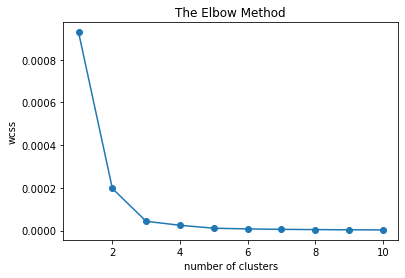

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
for i in range(len(wcss)):
    if wcss[i] >0:
        print(wcss[i+1])
        wc = wcss[i+2]
        index = i+2
        print(index)
        break

0.00019692527753157802
2


# 최적 매개변수 찾기

1


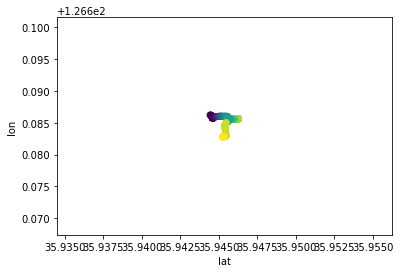

cluster of count  23
2


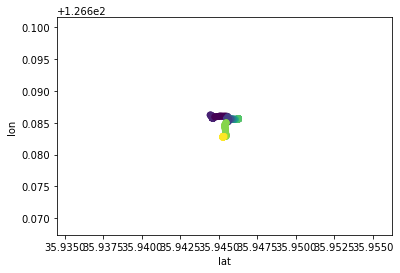

cluster of count  11
3


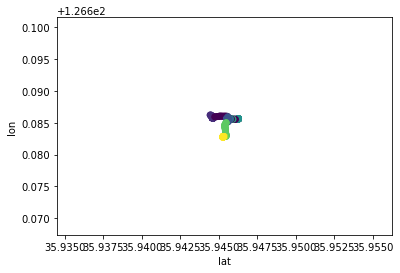

cluster of count  8
4


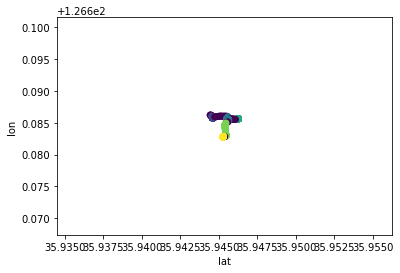

cluster of count  5
5


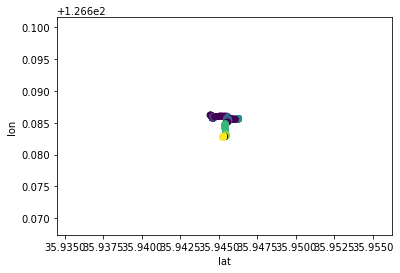

cluster of count  6
6


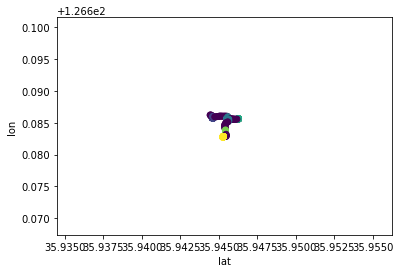

cluster of count  5
7


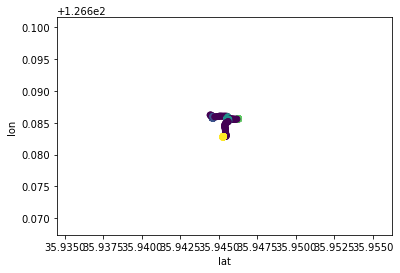

cluster of count  4
8


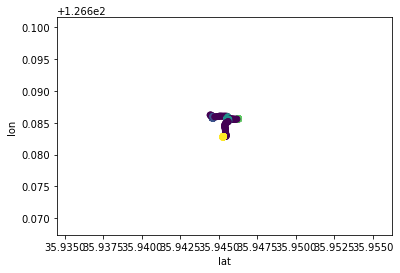

cluster of count  4
9


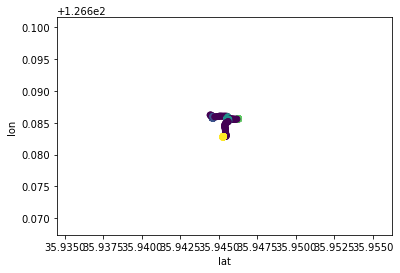

cluster of count  4
10


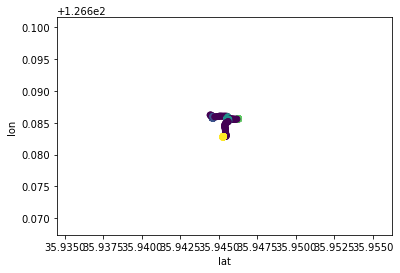

cluster of count  4
11


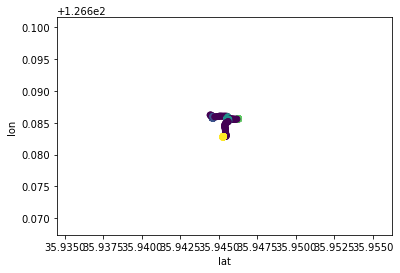

cluster of count  4
12


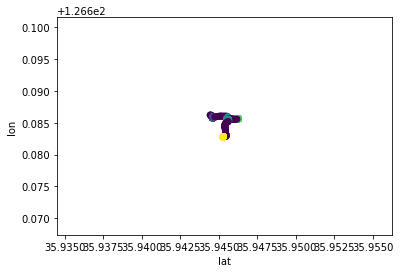

cluster of count  4
13


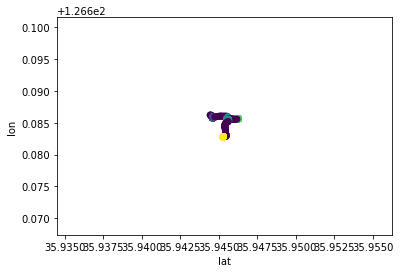

cluster of count  4
14


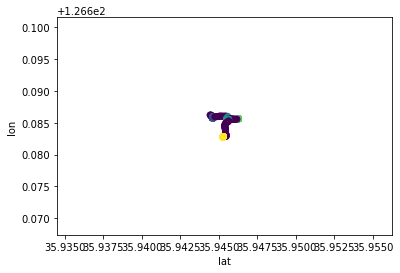

cluster of count  4
15


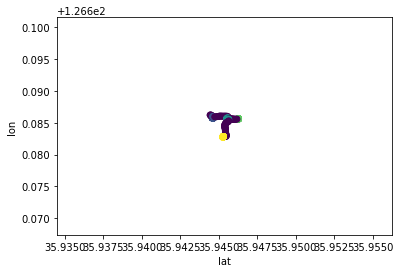

cluster of count  4
16


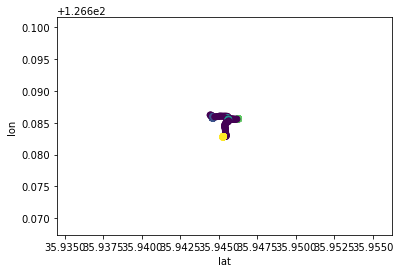

cluster of count  4
17


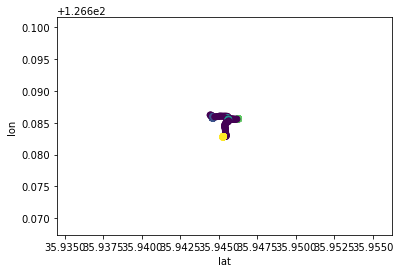

cluster of count  4
18


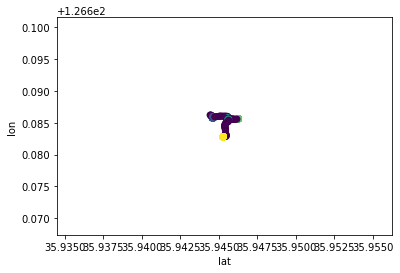

cluster of count  4
19


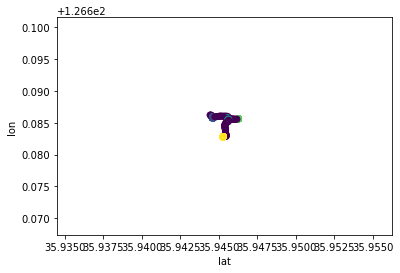

cluster of count  4
20


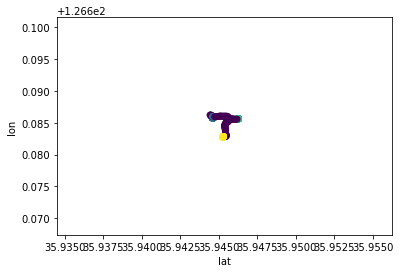

cluster of count  3
21


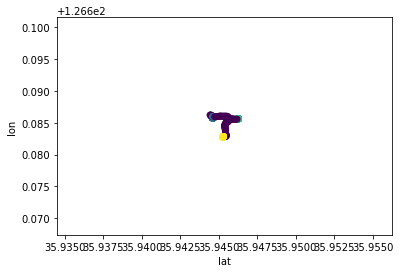

cluster of count  3
22


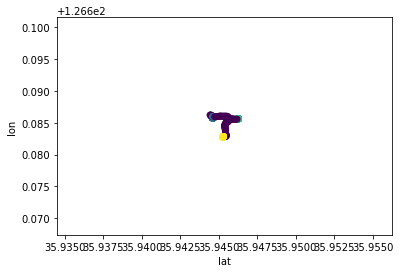

cluster of count  3
23


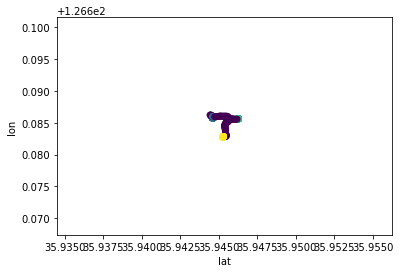

cluster of count  3
24


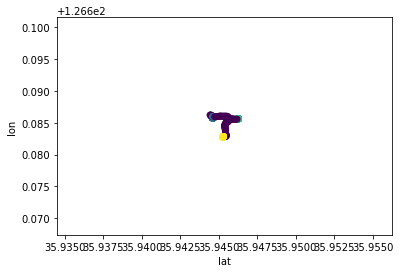

cluster of count  3
25


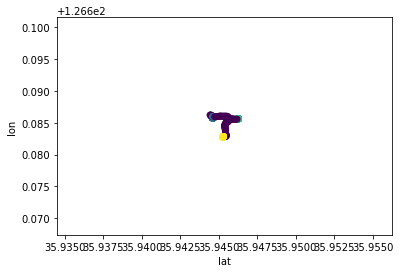

cluster of count  3
26


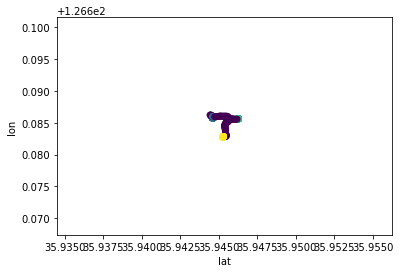

cluster of count  3
27


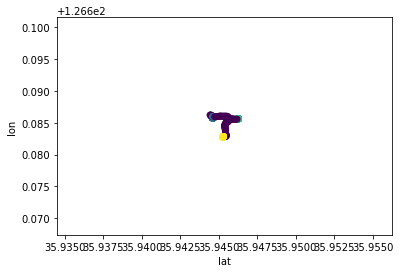

cluster of count  3
28


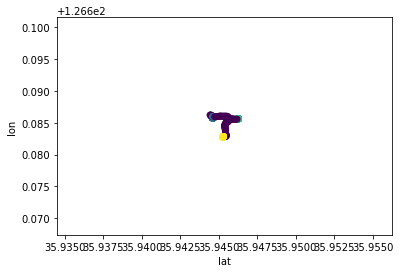

cluster of count  3
29


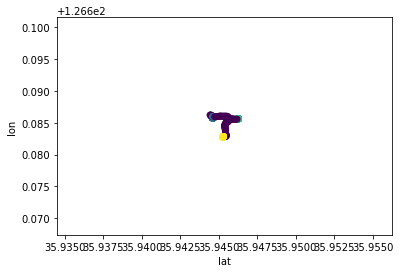

cluster of count  3
30


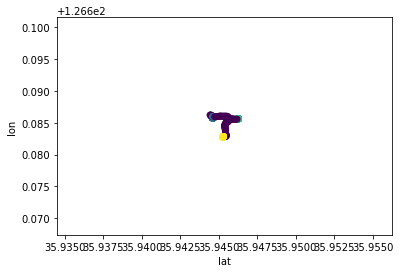

cluster of count  3
31


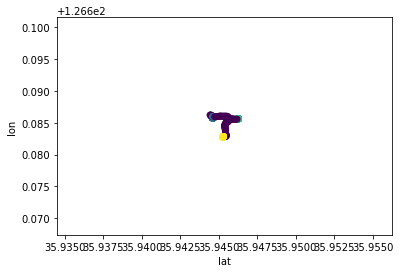

cluster of count  3
32


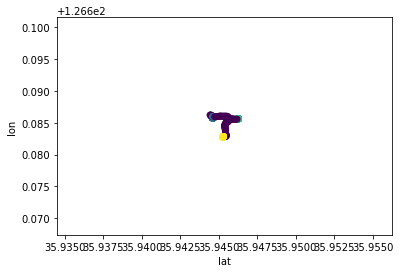

cluster of count  3
33


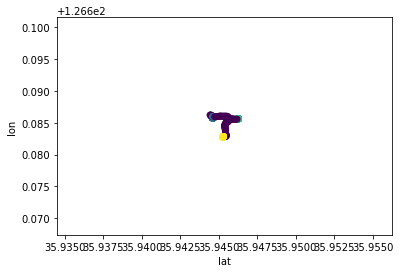

cluster of count  3
34


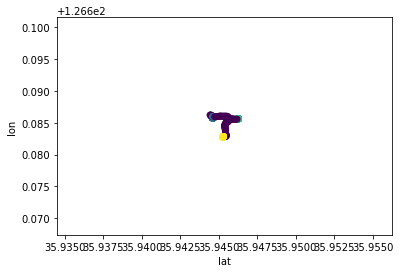

cluster of count  3
35


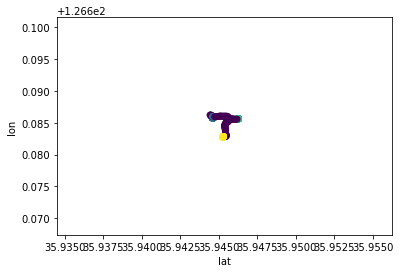

cluster of count  3
36


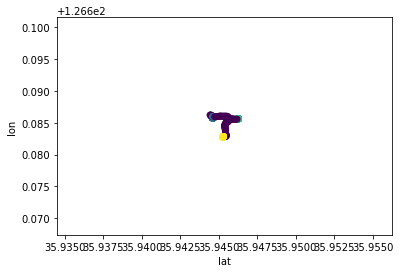

cluster of count  3
37


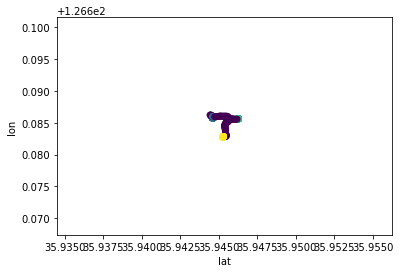

cluster of count  3
38


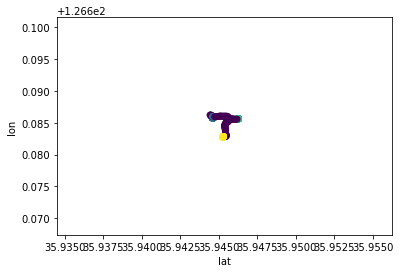

cluster of count  3
39


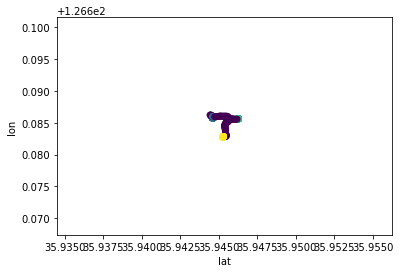

cluster of count  3
40


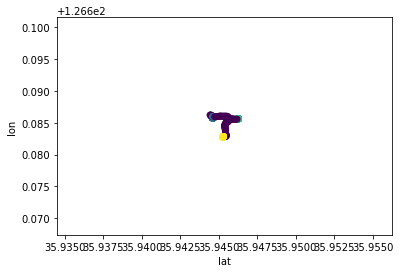

cluster of count  3
41


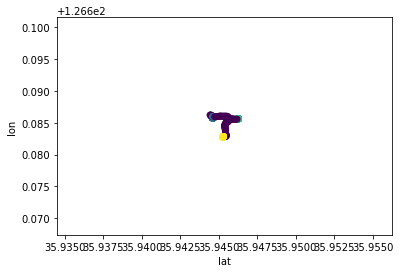

cluster of count  3
42


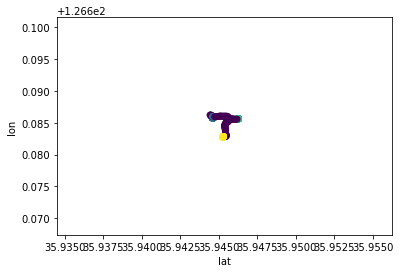

cluster of count  3
43


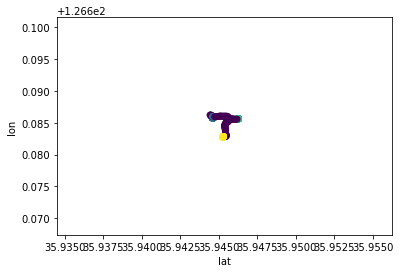

cluster of count  3
44


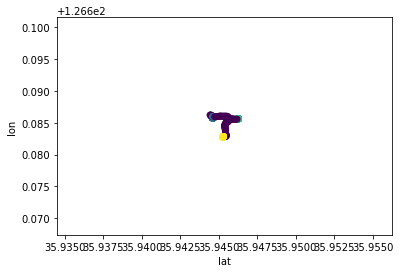

cluster of count  3
45


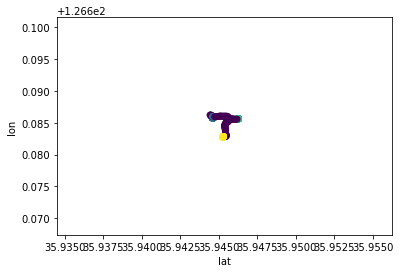

cluster of count  3
46


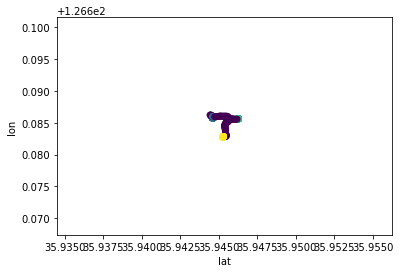

cluster of count  3
47


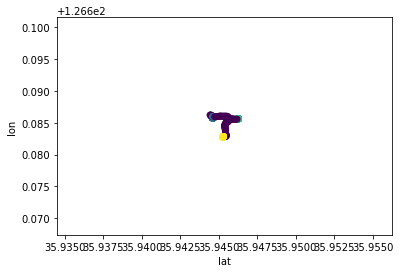

cluster of count  3
48


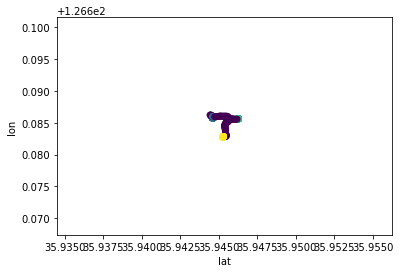

cluster of count  3
49


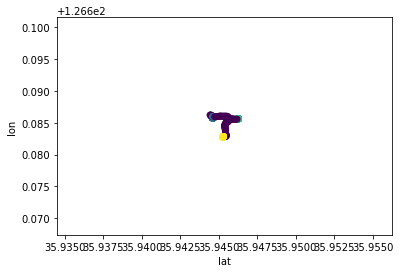

cluster of count  3
50


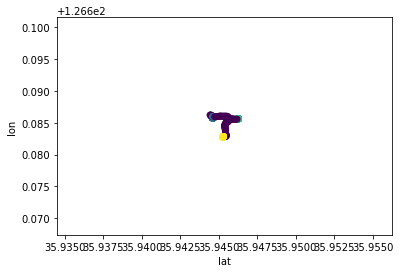

cluster of count  3
51


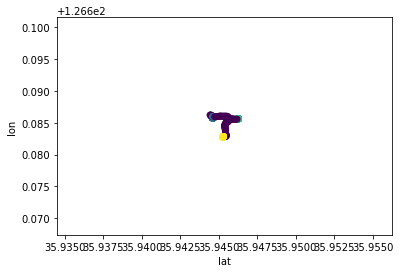

cluster of count  3
52


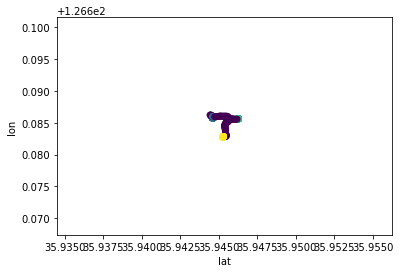

cluster of count  3
53


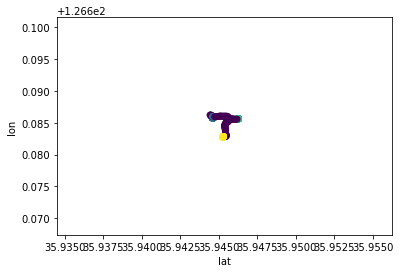

cluster of count  3
54


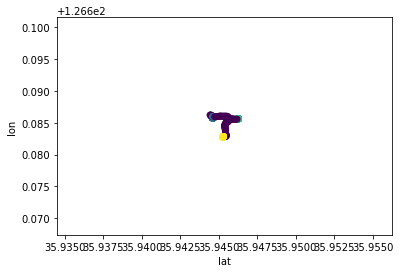

cluster of count  3
55


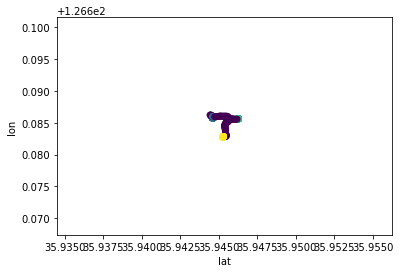

cluster of count  3
56


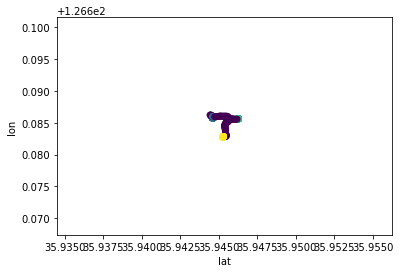

cluster of count  3
57


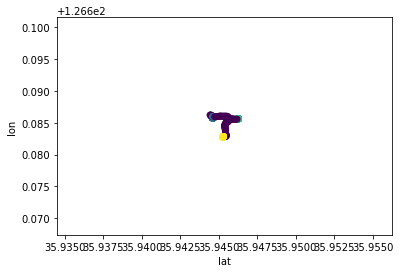

cluster of count  3
58


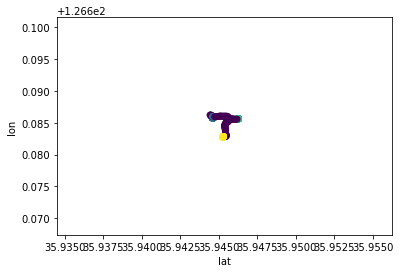

cluster of count  3
59


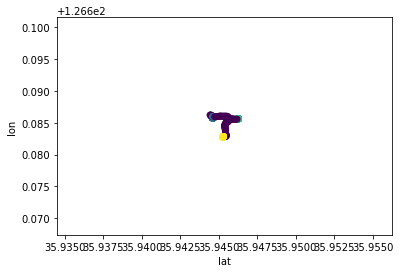

cluster of count  3
60


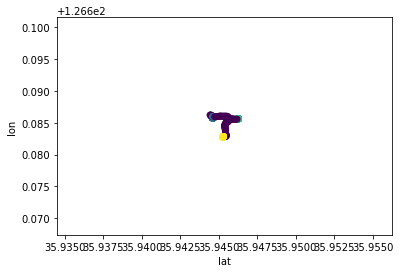

cluster of count  3
61


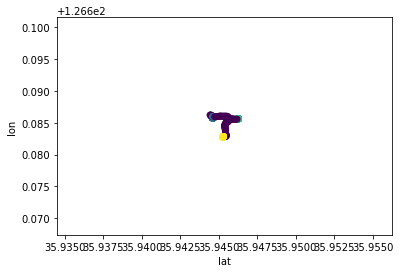

cluster of count  3
62


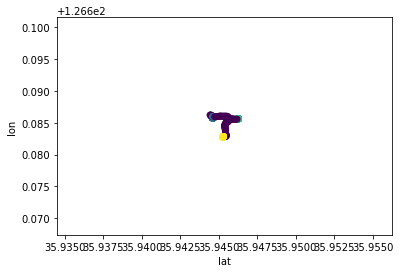

cluster of count  3
63


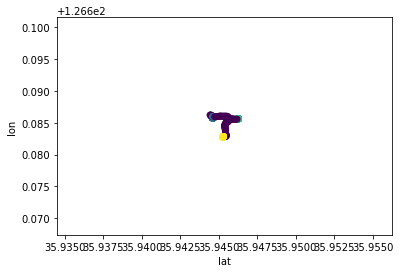

cluster of count  3
64


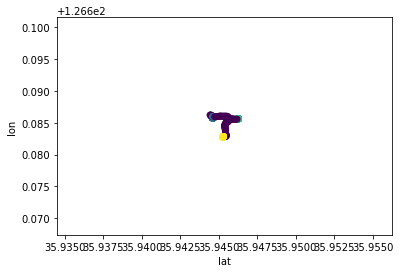

cluster of count  3
65


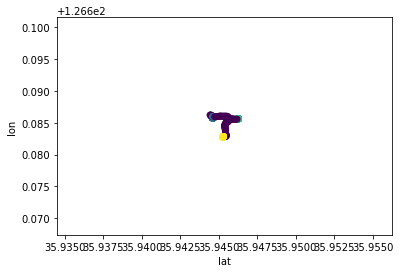

cluster of count  3
66


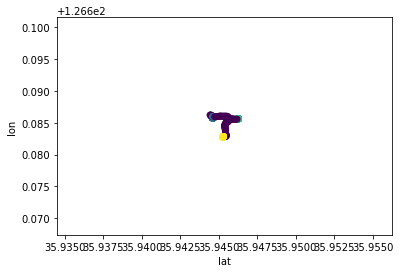

cluster of count  3
67


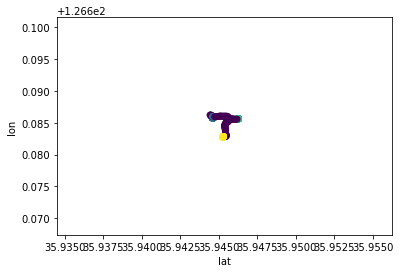

cluster of count  3
68


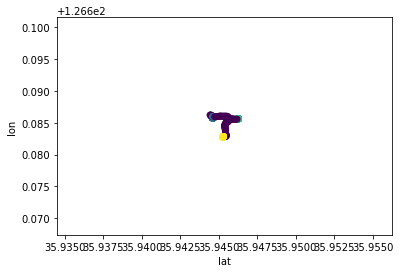

cluster of count  3
69


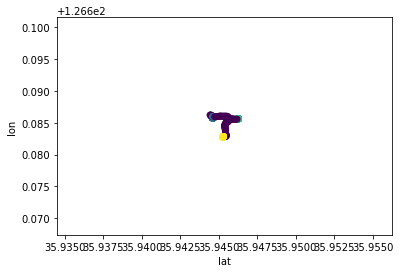

cluster of count  3
70


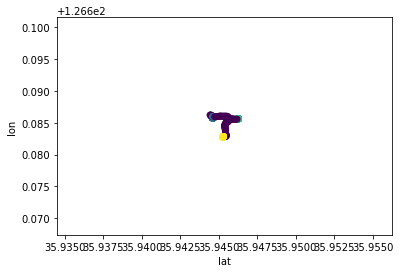

cluster of count  3
71


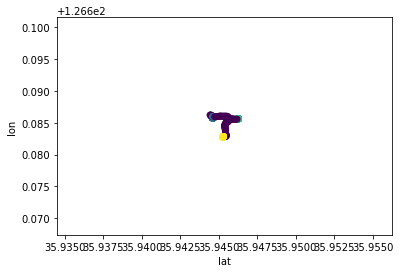

cluster of count  3
72


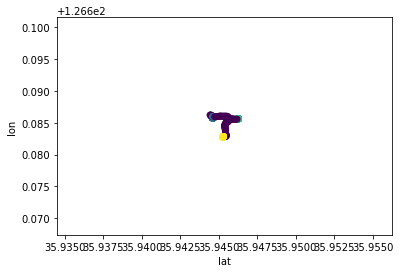

cluster of count  3
73


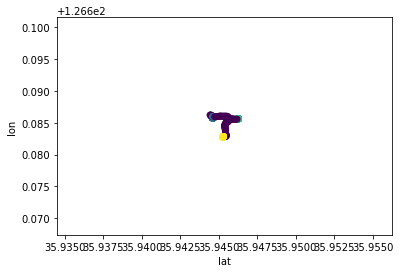

cluster of count  3
74


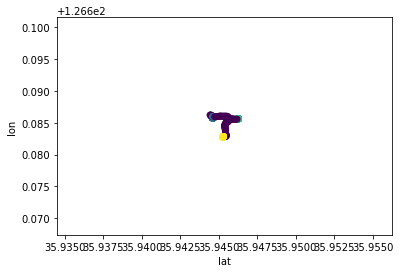

cluster of count  3
75


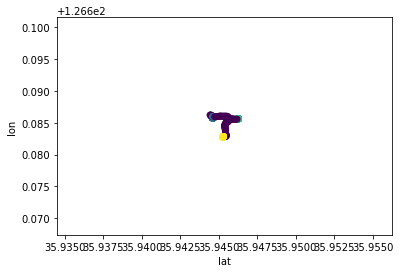

cluster of count  3
76


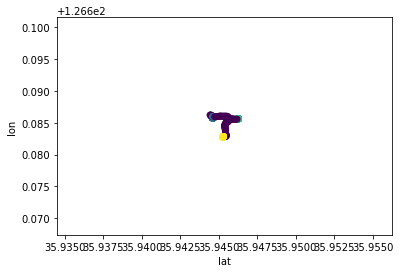

cluster of count  3
77


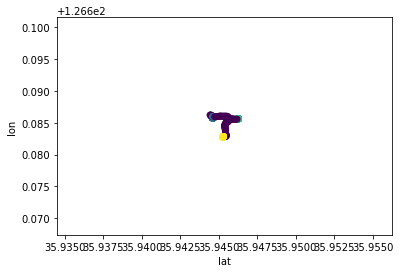

cluster of count  3
78


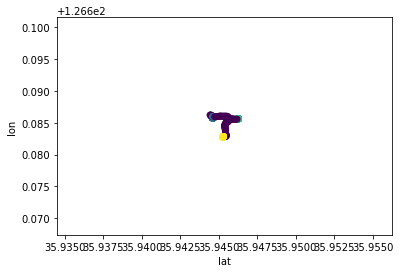

cluster of count  3
79


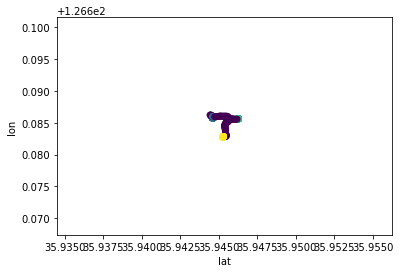

cluster of count  3
80


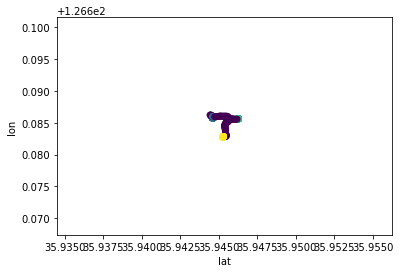

cluster of count  3
81


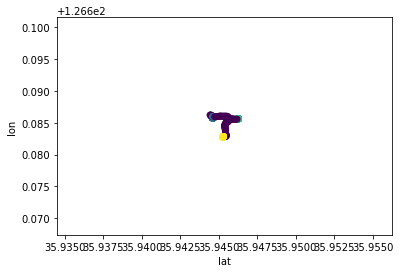

cluster of count  3
82


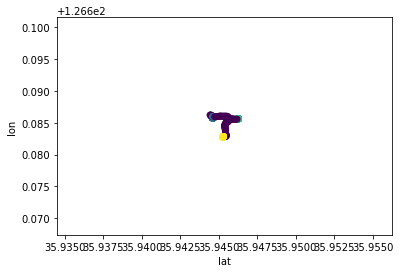

cluster of count  3
83


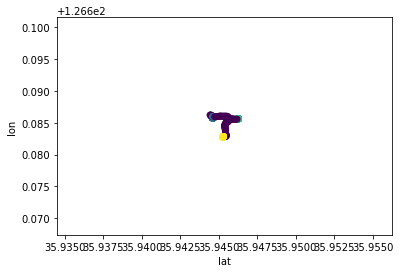

cluster of count  3
84


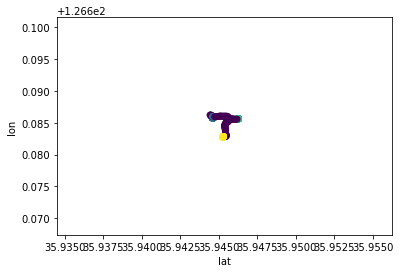

cluster of count  3
85


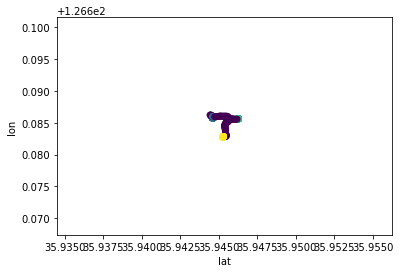

cluster of count  3
86


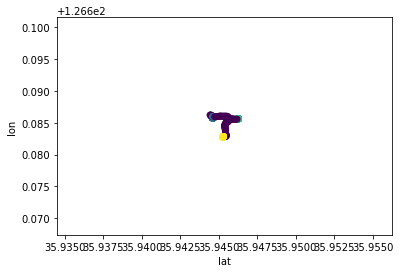

cluster of count  3
87


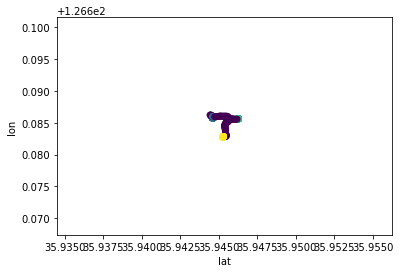

cluster of count  3
88


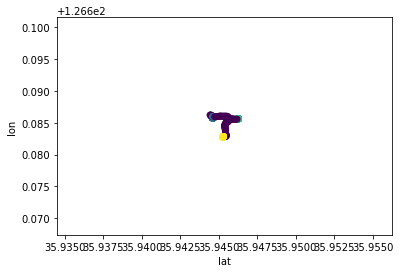

cluster of count  3
89


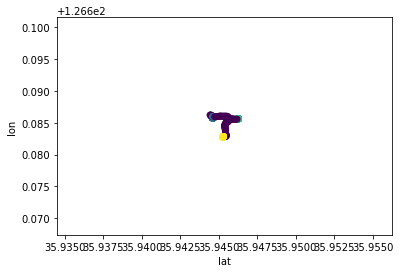

cluster of count  3
90


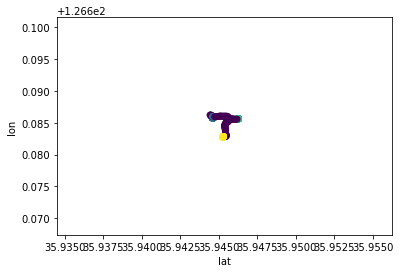

cluster of count  3
91


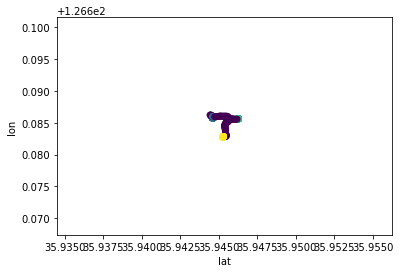

cluster of count  3
92


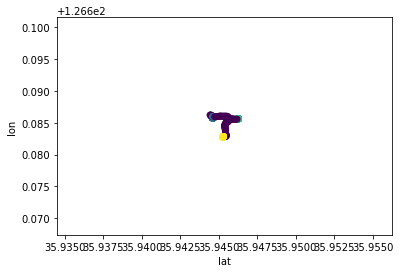

cluster of count  3
93


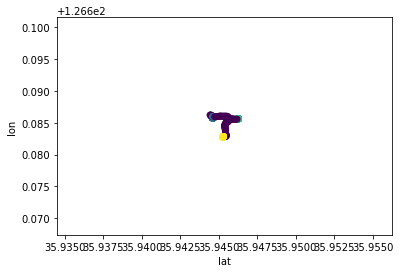

cluster of count  3
94


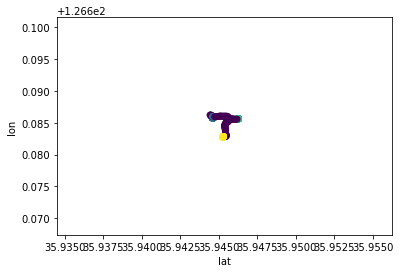

cluster of count  3
95


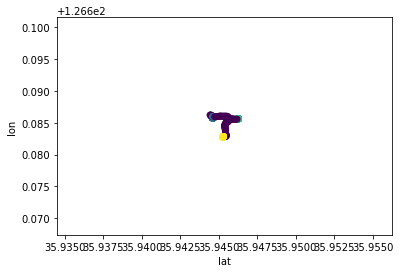

cluster of count  3
96


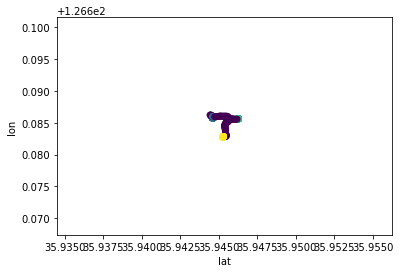

cluster of count  3
97


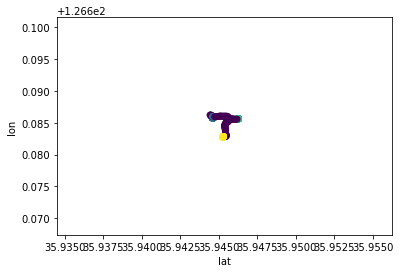

cluster of count  3
98


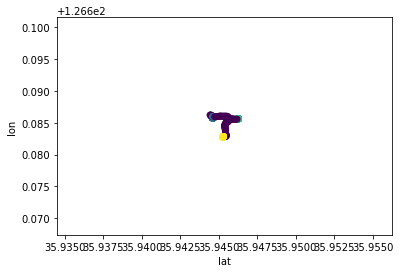

cluster of count  3
99


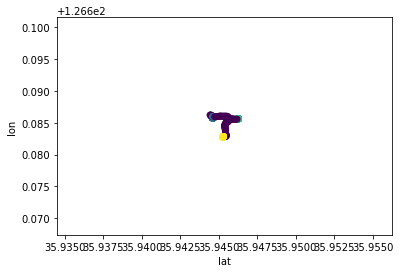

cluster of count  3
100


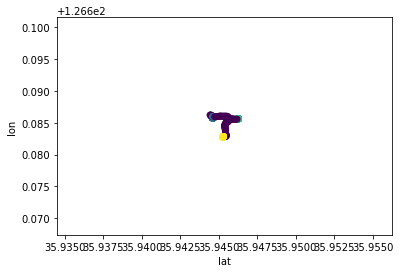

cluster of count  3
101


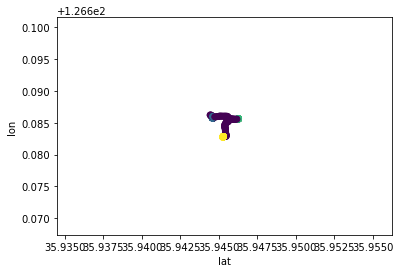

cluster of count  3
102


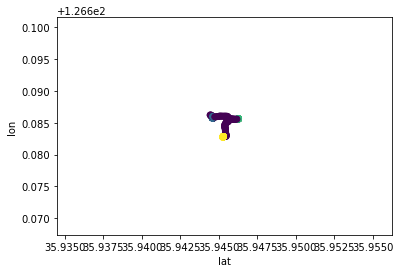

cluster of count  3
103


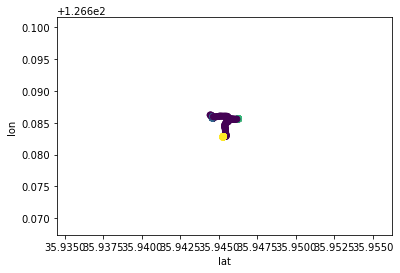

cluster of count  3
104


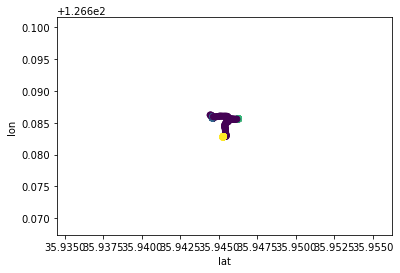

cluster of count  3
105


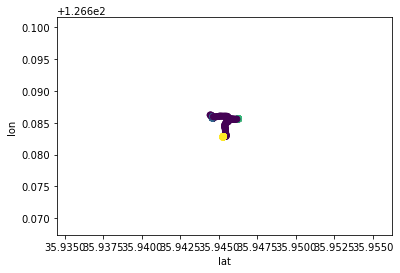

cluster of count  3
106


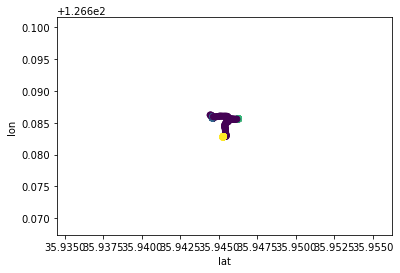

cluster of count  3
107


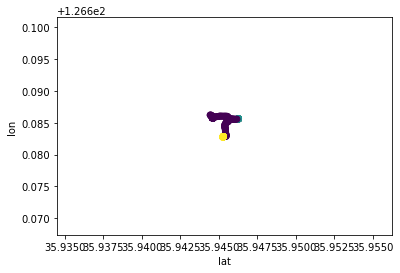

cluster of count  2
106


In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

for i in range(1,200):
    db = DBSCAN(eps=wc, min_samples=i, algorithm='ball_tree',metric='haversine').fit(x)
    cluster = db.fit_predict(x)
    label = db.labels_
    cluster_label = get_cluster_count(label)
    plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
    print(i)
    plt.xlabel("lat")
    plt.ylabel("lon")
    plt.show()
    print("cluster of count ",len(cluster_label)-1)
    if len(cluster_label)==index+1:
        print(i-1)
        break

# DBSCAN 수행 결과

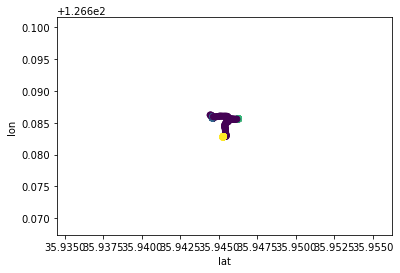

cluster of count  3


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=wc, min_samples=i-1,algorithm='ball_tree', metric='haversine').fit(x)
cluster = db.fit_predict(x)
label = db.labels_
cluster_label = get_cluster_count(label)
plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()
print("cluster of count ",len(cluster_label)-1)

In [16]:
print(label)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2

In [17]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [18]:
cluster_label = get_cluster_count(label)
cluster_label.remove(-1)
print('클러스터 라벨: ', cluster_label)  

클러스터 라벨:  [0, 1, 2]


In [19]:
cluster_list = [ [] for i in range(len(cluster_label))]

for i in range(len(cluster_label)):
    for j in range(len(label)):
        if cluster_label[i] == label[j]:
            x_data = x.tolist()
            cluster_list[i].append([str(df['time'][j]), x_data[j][0], x_data[j][1]])

In [20]:
cluster_list

[[['2021-03-09 16:34:20', 35.9446023, 126.6857467],
  ['2021-03-09 16:34:25', 35.9446023, 126.6857467],
  ['2021-03-09 16:34:30', 35.944598, 126.685754],
  ['2021-03-09 16:34:35', 35.9445981, 126.6857554],
  ['2021-03-09 16:34:40', 35.9445987, 126.68575249999999],
  ['2021-03-09 16:34:45', 35.9445987, 126.68575249999999],
  ['2021-03-09 16:34:50', 35.944598, 126.68575590000002],
  ['2021-03-09 16:34:55', 35.9445981, 126.68575859999999],
  ['2021-03-09 16:35:00', 35.9445978, 126.685758],
  ['2021-03-09 16:35:05', 35.9445987, 126.68575290000001],
  ['2021-03-09 16:35:10', 35.944598, 126.68575630000001],
  ['2021-03-09 16:35:15', 35.9445977, 126.6857584],
  ['2021-03-09 16:35:20', 35.9445977, 126.6857564],
  ['2021-03-09 16:35:25', 35.9445979, 126.68575690000002],
  ['2021-03-09 16:35:30', 35.9445978, 126.6857567],
  ['2021-03-09 16:35:35', 35.9445981, 126.6857584],
  ['2021-03-09 16:35:40', 35.9445978, 126.68575630000001],
  ['2021-03-09 16:35:45', 35.9445982, 126.6857534],
  ['2021-03-0

# 클러스터 중심점

In [21]:
cluster_center = []
for i in range(len(cluster_list)):
    lat_sum = 0
    lon_sum = 0
    for j in range(len(cluster_list[i])):
        lat_sum += cluster_list[i][j][1]
        lon_sum += cluster_list[i][j][2]
    cluster_center.append([lat_sum / len(cluster_list[i]) , lon_sum / len(cluster_list[i])])

In [22]:
for i in range(len(cluster_center)):
    print(i+1, "->", cluster_center[i])

1 -> [35.94459671962617, 126.68576081214954]
2 -> [35.946251071428584, 126.68559768907566]
3 -> [35.94527830583335, 126.68280933999999]


# 체류 지점 좌표, 주소 , 상호명 리스트

In [23]:
place_list = []
addr_list = []
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        addr_list.append(j)
        place = kakao_get_place_addr(j)
        if place[0] == "no results":
            place = building
        print('',str(i+1),". 체류 지점",'\033[34m좌표\033[0m ->(',cluster_center[i][0],',', cluster_center[i][1],')',)
        print('',str(i+1),". 체류 지점",'\033[34m주소\033[0m ->' + '\033[0m', j) 
        print('\033[31m ' + '상호명: ' + '\033[0m', place) 
        place_list.append(place)
    print()

 1 . 체류 지점 좌표 ->( 35.94459671962617 , 126.68576081214954 )
 1 . 체류 지점 주소 -> 전북 군산시 미룡동 882-4
 상호명:  ['no results']

 2 . 체류 지점 좌표 ->( 35.946251071428584 , 126.68559768907566 )
 2 . 체류 지점 주소 -> 전북 군산시 미룡동 872-1
 상호명:  ['허니툰 군산본점', '커피면회소 군산대점', '담꾹 군산대미룡점', '더벤티 군산대점', '구구보드카페', '안경매니져 군산대점']

 3 . 체류 지점 좌표 ->( 35.94527830583335 , 126.68280933999999 )
 3 . 체류 지점 주소 -> 전북 군산시 미룡동 290-2
 상호명:  ['군산대학교', 'GS25 군산대본점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 황룡도서관', '군산대학교 제2학생회관', '군산대학교 학생생활관 관리동', '군산대학교 대학본부', '군산대학교 박물관', 'IBK기업은행365 군산대학교출장소', '군산대학교 디지털정보관', '한울미디어', '동원문고', '군산대학교 음악관', '더큰도시락 군산대점', '군산대학교 황룡문화원', '군산대학교 중앙도서관', '군산대학교 평생교육원제2동', '군산대학교 문무관', '사회관', '군산대학교 종합교육관', '군산 청년해외취업지원센터', '군산대학교 산업대학원', '베토벤안경원', '군산대학교 인문대학사회과학대학', '군산시 귀어귀촌지원센터', '군산대학교 교육대학원', '황룡쉼터', '군산대학교정류소', '군산대학교 간호학과', '군산대학교 자연과학대학4호관', '전북은행365코너 군산대지점', '군산대생협그라찌에', '군산대학교 진리관', '군산대학교 누리관', '군산 대학교 테니스장1', '군산대학교 자연과학대학 3호관', '군산대학교 남문', '체험과여행사업단', '카페드림 군산대학교중앙도서관점', '군산대학교 자연과학대학1호관', '군산대학교 

# 주소로 매핑

In [24]:
from haversine import haversine
dist_list = []
result_place = []
for i in range(len(addr_list)):
    dist = 0
    cnt = 0
    for k in range(len(poi_candidate)):
        if addr_list[i] == poi_candidate["주소"][k]:
            #print(i, "place_list: ", place_list[i])
            print(i+1, "-> 매칭 장소: ", poi_candidate["상호명"][k])
            a =[]
            a.append(float(poi_candidate["lat"][k]))
            a.append(float(poi_candidate["lon"][k]))
            a = np.array(a)
            dist = haversine(a,np.array(cluster_center[i]), unit='km')
            print('dist:',dist)
            #print(dist)
            dist_list.append([i+1,dist, poi_candidate["상호명"][k]])
    print()

1 -> 매칭 장소:  집
dist: 0.0160595602555261

2 -> 매칭 장소:  커피면회소
dist: 0.0059464979161602104

3 -> 매칭 장소:  군산대학교 디지털정보관
dist: 0.033867771999001955
3 -> 매칭 장소:  군산대학교 인문대학사회과학대학
dist: 0.34677958887287574
3 -> 매칭 장소:  군산대학교 자연과학대학4호관
dist: 0.16157233996094558
3 -> 매칭 장소:  군산대학교 종합교육관
dist: 0.18418596305765841



# 거리 순 정렬

In [25]:
dist_list.sort(key = lambda dist_list:dist_list[1]) # 거리 순 정렬
dist_list

[[2, 0.0059464979161602104, '커피면회소'],
 [1, 0.0160595602555261, '집'],
 [3, 0.033867771999001955, '군산대학교 디지털정보관'],
 [3, 0.16157233996094558, '군산대학교 자연과학대학4호관'],
 [3, 0.18418596305765841, '군산대학교 종합교육관'],
 [3, 0.34677958887287574, '군산대학교 인문대학사회과학대학']]

In [26]:
result_place = []
cluster_num = []
for i in range(len(cluster_center)):
    for j in range(len(dist_list)):
        if str(i+1) in str(dist_list[j][0]):
            result_place.append(dist_list[j])
            cluster_num.append(i+1)
            break

In [27]:
for i in range(len(result_place)):
    print(i+1, '-> 매칭 장소:', result_place[i][2])
    print('dist:',result_place[i][1])

1 -> 매칭 장소: 집
dist: 0.0160595602555261
2 -> 매칭 장소: 커피면회소
dist: 0.0059464979161602104
3 -> 매칭 장소: 군산대학교 디지털정보관
dist: 0.033867771999001955


In [28]:
def search_index(n, arr):
    for i in range(len(arr)):
        if arr[i][0] == n:
            return i

In [29]:
for i in range(len(cluster_center)):
    if i+1 in cluster_num:
        print(i+1, "-> 매칭 장소:", result_place[search_index(i+1, result_place)][2])
    else:
        print(i+1, "-> 매칭 장소: 없음")

1 -> 매칭 장소: 집
2 -> 매칭 장소: 커피면회소
3 -> 매칭 장소: 군산대학교 디지털정보관


In [30]:
time = []
place = []
for i in range(len(cluster_list)):
    time.append(cluster_list[i][0][0]+" ~ "+cluster_list[i][len(cluster_list[i])-1][0])
    place.append(result_place[search_index(i+1, result_place)][2])

In [31]:
addr = []
lat = []
lon = []
type_list=[]
for i in range(len(place)):
    for j in range(len(poi_candidate)):
        if place[i] == poi_candidate['상호명'][j]:
            addr.append(poi_candidate['주소'][j])
            type_list.append(poi_candidate['유형'][j])
            lat.append(poi_candidate['lat'][j])
            lon.append(poi_candidate['lon'][j])

# 다양한 정보가 포함된 POI 테이블 생성

In [32]:
test = pd.DataFrame({'p_num':cluster_num,'time': time, 'place': place, 'type': type_list,'addr':addr,'lat':lat,'lon':lon})
test

,p_num,time,place,type,addr,lat,lon
0,1,2021-03-09 16:34:20 ~ 2021-03-09 16:43:55,집,기타,전북 군산시 미룡동 882-4,35.944731,126.685825
1,2,2021-03-09 16:47:30 ~ 2021-03-09 16:57:20,커피면회소,음식점 > 카페,전북 군산시 미룡동 872-1,35.946298,126.685630
2,3,2021-03-09 17:01:41 ~ 2021-03-09 17:11:36,군산대학교 디지털정보관,"교육,학문 > 학교부속시설",전북 군산시 미룡동 290-2,35.944974,126.682785


# 사용자 이동 경로 도출 결과

In [33]:
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(cluster_center)):
    iframe = str(i+1)+". "+str(result_place[search_index(i+1, result_place)][2])
    popup = folium.Popup(iframe,min_width=100, max_width=250)
    folium.Marker(location=[cluster_center[i][0], cluster_center[i][1]], 
                  icon=folium.Icon(color = "red"),popup = popup).add_to(m)
    origin_point = [cluster_center[i-1][0], cluster_center[i-1][1]]
    if i == 0:
        pass
    else:
        iframe = str(result_place[search_index(i, result_place)][2])+ " → \n" + str(result_place[search_index(i+1, result_place)][2])
        popup = folium.Popup(iframe,min_width=100, max_width=250)
        folium.PolyLine([origin_point, [cluster_center[i][0], cluster_center[i][1]]], color='red',weight=5,popup = popup).add_to(m)
m